## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df=pd.read_csv('ab_data.csv')

b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

d. The proportion of users converted.

In [5]:
(df.converted.sum()/df.timestamp.count())*100

11.965919355605511

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
df[((df['landing_page'] == 'new_page') == (df['group'] == 'treatment')) == False].count()

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

f. Do any of the rows have missing values?

In [7]:
df.isnull().values.any()

False

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2=df[((df['group']=='treatment')!=(df['landing_page'] =='new_page'))|((df['landing_page'] =='old_page')!=(df['group'] =='control'))==False]

In [9]:
df2.shape

(290585, 5)

In [10]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].count()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
df2[df2.duplicated('user_id')==True]


,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [14]:
df2[df2.duplicated('user_id')==True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
df2.drop([2893],axis=0, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
df2['converted'].sum()/df2['user_id'].count()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
#df2[(df2['group'] == 'control')].count()
(df2[(df2['group'] == 'control')&(df2['converted']==1)].count())/(df2[(df2['group'] == 'control')].count())

user_id         0.120386
timestamp       0.120386
group           0.120386
landing_page    0.120386
converted       0.120386
dtype: float64

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
(df2[(df2['group'] == 'treatment')&(df2['converted']==1)].count())/(df2[(df2['group'] == 'treatment')].count())

user_id         0.118808
timestamp       0.118808
group           0.118808
landing_page    0.118808
converted       0.118808
dtype: float64

d. What is the probability that an individual received the new page?

In [19]:
(df2[(df2['landing_page']=='new_page')].count())/(df2['landing_page'].count())

user_id         0.500062
timestamp       0.500062
group           0.500062
landing_page    0.500062
converted       0.500062
dtype: float64

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

In [20]:
(df2[(df2['landing_page'] == 'new_page')==(df2['converted']==1)].count())/(df2['landing_page'].count())

user_id         0.499164
timestamp       0.499164
group           0.499164
landing_page    0.499164
converted       0.499164
dtype: float64

**According to the information,new treatment pages leads to less conversion as compared to old page**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

H0:pnew−pold≤0

H0:pnew−pold>0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [21]:
p_new=df2['converted'].sum()/df2['user_id'].count()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [22]:
p_old=df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [23]:
n_new=df2[(df2['group']=='treatment')].shape[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [24]:
n_old=df2[(df2['group']=='control')].shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
new_page_converted = np.random.binomial(1, p_new, n_new)
tsm = new_page_converted.mean()
tsm

0.11959259514142179

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
old_page_converted = np.random.binomial(1, p_old, n_old)
csm = old_page_converted.mean()
csm

0.11913349945620001

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
# compute simulated difference in conversion rate
sim_diff = tsm - csm

# display simulation difference
sim_diff


0.0004590956852217748

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [28]:
p_diffs = []
for _ in range(10000):
    old_page_converted = np.random.binomial(1, p_old, n_old)
    csm_b = old_page_converted.mean()
    new_page_converted = np.random.binomial(1, p_new, n_new)
    tsm_b = new_page_converted.mean()
    p_diffs.append(tsm_b - csm_b)

In [29]:
p_diffs = np.array(p_diffs)
pdm = p_diffs.mean()
pdm

2.4917847806221015e-06

In [30]:
p_diffs.std()

0.0011966357068480065

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

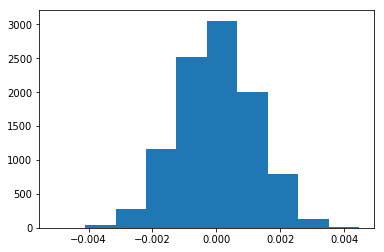

In [31]:
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [32]:
ccr = df2.query('group == "control"')['converted'].mean()
tcr = df2.query('group == "treatment"')['converted'].mean()
obs_diff = tcr - ccr
obs_diff

-0.0015782389853555567

In [33]:
# compute p value
pvalue = (p_diffs > obs_diff).mean()
pvalue

0.90820000000000001

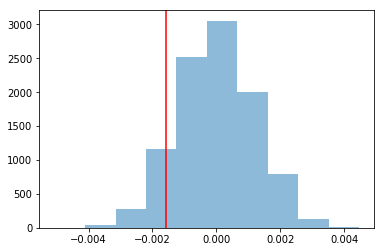

In [34]:
# plot line for observed statistic
plt.hist(p_diffs, alpha=.5)
plt.axvline(x=obs_diff, color='red');

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**We computed a p_value of 0.9099 which means that 90.99% of the differences can be attributed to pure chance. 90.99% of Part II 2h's p_diffs (difference in means) is higher than the observed difference we see in our dataset. This was only a simulation. Not the actual data. The observed difference in the data is only higher than ~ 9% of the simulated difference assuming both pages conversion rates are the same. This is well above the .05 null hypothesis threshold. This is not a significant result. We would accept the null hypothesis.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [35]:
import statsmodels.api as sm

convert_old = df2.query('group == "control" and converted == 1').shape[0]
convert_new = df2.query('group == "treatment" and converted == 1').shape[0]
n_old = df2[(df2['group']=='control')].shape[0]
n_new = df2[(df2['group']=='treatment')].shape[0]
print(convert_old, convert_new, n_old, n_new)

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


17489 17264 145274 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [36]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
z_score, p_value

(1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**A z_score is the number of standard deviations away from the mean that the element is. In this case the element is the mean of the conversion events. With a z_score of 1.31 this means that this value lies between the 1st and 2nd standard deviations. A standard deviation of 1 contains ~68% of all elements. A standard deviation of 2 contains ~ 95% of all elements. This z_score puts the p_value comfortably in the distribution.
.9051 > .05. With a p_value of .9051 we accept the null hypothesis. That is the old_page is the same or better than the new_page..**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**We would use a logistic regression model. The reason why we would use this versus Ordinairy Least Squares (OLS/Chi-square goodness of fit) is that we have a categorical dependent variable (conversion rate). We will use statsmodels Logit method**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [37]:
#Make a copy
df2c = df2.copy()
df2c.head(2)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0


In [38]:
df2c[['group_1', 'group_2' ]] = pd.get_dummies(df2c.group)
df2c[['lp1', 'lp2' ]] = pd.get_dummies(df2c.landing_page)
df2c = df2c.rename(columns={'group_2': 'ab_page', 'lp1': 'treatment'})
df2c = df2c.drop(['timestamp','group',  'landing_page', 'lp2', 'group_1', 'treatment'], axis=1)

In [39]:
df2c['intercept'] = 1

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [40]:
log_mod = sm.Logit(df2c['converted'], df2c[['intercept', 'ab_page']])
results = log_mod.fit()
results.summary()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 01 Jul 2019   Pseudo R-squ.:               8.077e-06
Time:                        18:37:49   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [41]:
np.exp(-1.9888), np.exp(-0.0150)

(0.13685955841614492, 0.98511193960306265)

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**In Part II the p_value is from .9051 to .9038. In Part III the p_value is .19.
The reason is in Part II we constructed a hypothesis that would only be tested in one direction. We did this because we wanted to prove the Alternate Hypothes is True. Ergo the new_page has a significantly higher conversion rate than the old_page. This is just one sided. It is not interested in the possibility that the new_page could be much worse than the old_page. If the new_page is much worse. No big deal. We just keep the old_page. Our hypotheses statements affect what our p-value is because it changes which side(s) (or both sides) from the distribution we are calculating the p-value from. The hypotheses in Part II is a one tail test. Part III is a two tail regression test.
You can equivalence the p-values using this math. (1 - (0.19/2) = 0.95).We calculated in Part II j a p_value 0f .9038 and a p_value of .9051 in Part II l. Close enough to .95 to be equivalent. In Part II we are concerned with which page had a higher conversion rate, so a one-tailed test. However, in Part III, a regression test is not concerned with a positive or negative change. It checks to see if the independent variable (ab_page/new_page) had any effect at all, so a two-tailed test.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**One idea alluded to within this project is looking at the date and time information to see if that has correlations within it that changes the conversion rates in favor of the new_page. Timing of behaviour within an A/B test is often quite important. Different people respond differently to change. Some people like change (almost no matter what). Other people have a lot of inertia when it comes to change, even if it is positive. This data is time and date stamped. We will explore that idea below.
It is always good to reflect upon what your data seems to be telling you. Simpson's Paradox is an excellent example of that. Looking at the data within categories (for example), sometimes obscures the fact, that overall the answer to the question that you are asking is in effect opposite of what you observe in the specific catetegories..**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [42]:
cdf = pd.read_csv('countries.csv')

In [43]:
cdf.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [44]:
cdf2 = df2c.merge(cdf, on='user_id', how='inner')
cdf2.head(2)

,user_id,converted,ab_page,intercept,country
0,851104,0,0,1,US
1,804228,0,0,1,US


In [45]:
cdf2.isnull().sum()

user_id      0
converted    0
ab_page      0
intercept    0
country      0
dtype: int64

In [46]:
cdf2.country.unique()

array(['US', 'CA', 'UK'], dtype=object)

In [47]:
cdf2[['CA', 'UK', 'US']] = pd.get_dummies(cdf2['country'])
cdf2 = cdf2.drop(['country', 'CA'], axis=1)

In [48]:
cdf2.head()

,user_id,converted,ab_page,intercept,UK,US
0,851104,0,0,1,0,1
1,804228,0,0,1,0,1
2,661590,0,1,1,0,1
3,853541,0,1,1,0,1
4,864975,1,0,1,0,1


In [49]:
log_mod = sm.Logit(cdf2['converted'], cdf2[['intercept', 'ab_page', 'UK', 'US']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 01 Jul 2019   Pseudo R-squ.:               2.323e-05
Time:                        18:37:50   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

In [50]:
# Need to exponentiate in order to interpret them.
np.exp(-0.0149), np.exp(0.0506), np.exp(0.0408)

(0.9852104557227469, 1.0519020483004984, 1.0416437559600236)

In [51]:
# Explain negative, easier to explain as 1/np.exp()
1/np.exp(-0.0149)

1.0150115583846535

**Each of these exponentiated values is the multiplicative change in the odds of conversion occurring**

**For the UK variable (if the user was from the UK) conversion is 1.052 times as likely, holding all else constant.
For the US variable (if the user was from the US) conversion is 1.042 times as likely, holding all else constant.
When you have values that are less than one it is often advantageous to compute the reciprocal in order to explain the results more clearly. For each 1 unit decrease in new_page, conversion is 1.015 times as likely holding all else constant.
None of these p_values are significant. They are all above .05. We would accept the null hypothesis. The new_page is not significantly better than the old_page. **

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [52]:
df_int = cdf2.copy()
df_int.head()

,user_id,converted,ab_page,intercept,UK,US
0,851104,0,0,1,0,1
1,804228,0,0,1,0,1
2,661590,0,1,1,0,1
3,853541,0,1,1,0,1
4,864975,1,0,1,0,1


In [53]:
log_mod = sm.Logit(df_int['converted'], df_int[['intercept', 'ab_page', 'UK',  'US']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 01 Jul 2019   Pseudo R-squ.:               2.323e-05
Time:                        18:37:51   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

In [54]:
df_int['UK_ab_page'] = df_int['UK'] * df_int['ab_page']
df_int['US_ab_page'] = df_int['US'] * df_int['ab_page']
df_int = df_int.drop('intercept', axis=1)
df_int.head()

,user_id,converted,ab_page,UK,US,UK_ab_page,US_ab_page
0,851104,0,0,0,1,0,0
1,804228,0,0,0,1,0,0
2,661590,0,1,0,1,0,1
3,853541,0,1,0,1,0,1
4,864975,1,0,0,1,0,0


In [55]:
df_int.corr(method='spearman')

,user_id,converted,ab_page,UK,US,UK_ab_page,US_ab_page
user_id,1.000000,0.001769,-0.001745,-0.002059,0.001187,-0.002814,0.000217
converted,0.001769,1.000000,-0.002432,0.001772,-0.000237,0.001827,-0.002563
ab_page,-0.001745,-0.002432,1.000000,-0.002092,0.001216,0.376626,0.734811
UK,-0.002059,0.001772,-0.002092,1.000000,-0.881979,0.653496,-0.423595
US,0.001187,-0.000237,0.001216,-0.881979,1.000000,-0.576370,0.480278
UK_ab_page,-0.002814,0.001827,0.376626,0.653496,-0.576370,1.000000,-0.276818
US_ab_page,0.000217,-0.002563,0.734811,-0.423595,0.480278,-0.276818,1.000000


**This question is asking what the covariance is between the country and the page. For example, do people from the UK like the new_page while people from the USA like the old_page? Here are my findings.**

*None of the p_values are significant.*

***When you look at the ab_page (conversion page), there is a strong correlation between people in the US visiting the new_page and converting there (.734811). It is possible that if you cut this data simply on USA you would find that there is strong reason to suggest that USA visitors should be shown the new_page. I will do a quick test on this below here.***

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [57]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0